In [2]:
#Нейросеть, находящая алгоритм нахождения перевода градусов Цельсия в градусы Фаренгейта

from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf

import numpy as np

In [3]:
celsius_q    = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
fahrenheit_a = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

for i,c in enumerate(celsius_q):
  print("{} градусов Цельсия = {} градусов Фаренгейта".format(c, fahrenheit_a[i]))

-40.0 градусов Цельсия = -40.0 градусов Фаренгейта
-10.0 градусов Цельсия = 14.0 градусов Фаренгейта
0.0 градусов Цельсия = 32.0 градусов Фаренгейта
8.0 градусов Цельсия = 46.0 градусов Фаренгейта
15.0 градусов Цельсия = 59.0 градусов Фаренгейта
22.0 градусов Цельсия = 72.0 градусов Фаренгейта
38.0 градусов Цельсия = 100.0 градусов Фаренгейта


In [4]:
# Сеть является полносвязной (Dense-сетью), состоящей из одного слоя l0 и одного нейрона
l0 = tf.keras.layers.Dense(units=1, input_shape=[1])
# input_shape=[1] - размерность входного параметра - единичное значение. Матрица размером 1×1 с единственным значением.
# Так как это первый (и единственный) слой, то и размерность входных данных соответствует размерности всей модели.
# units=1 - количество нейронов в слое. Количество нейронов определяет количество внутренних переменных слоя будет использовано для обучения
# при поиске решения поставленной задачи. Так как это последний слой, то его размерность равна размерности результата - выходного значения модели -
# единственного числа с плавающей запятой представляющего собой градусы Фаренгейта.
# (В многослойной сети размеры и форма слоя input_shape должны соответствовать размерам и формам следующего слоя).

In [5]:
# Преобразование слоя в модель
model = tf.keras.Sequential([l0])
# Sequential-модель принимает в качестве аргументов перечень слоёв в том порядке в котором их необходимо применять -
# от входного значения до выходного значения. Примечание: слои можно определить прямо в функции модели

In [6]:
# Компиляция модели перед тренировкой (обязательный шаг)
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
# При компиляции для тренировки необходимы:
# функция потерь - способ измерения, насколько далеко предсказываемое значение от желаемого выходного значения (измеримая разница называется «потерей»).
# функция оптимизации - способ корректировки внутренних переменных для уменьшения потерь.
# mean_squared_error - среднеквадратичная ошибка
# Adam(0.1) - функция оптимизации, где 0.1 - коэффициент скорости обучения (learning rate). Чем он меньше, тем выше точность но ниже скорость тренировки.

In [7]:
# Сама тренировка
# Метод fit возвращает объект, который содержит информацию об изменении потерь с каждой последующей итерацией.
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)
# где celsius_q и fahrenheit_a - входные и выходные данные, epochs - количество шагов данного обучающего цикла, verbose - контролирует уровень логгирования
print("Завершили тренировку модели")

Завершили тренировку модели


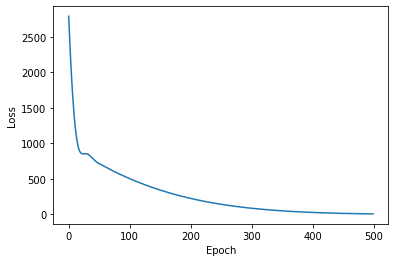

In [8]:
# Вывод статистики тренировки с помощью matplotlib
import matplotlib.pyplot as plt
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'])

In [9]:
# Использования натренированной модели для предсказания
print(model.predict([100.0]))
# Модель была обучена на 3500 примерах (7 пар значений, 500 обучающих итераций)

[[211.32448]]


In [10]:
# Отображение внутренних переменных Dense-слоя (весов слоя)
print("Это значения переменных слоя: {}".format(l0.get_weights()))
# Нейрон с единственным входом и выходом содержит в себе простую математику y = mx + b (как уравнение прямой),
# которая представляет собой не что иное, как нашу с вами формулу преобразования градусов Цельсия в градусы Фаренгейта, f = 1.8c + 32.

Это значения переменных слоя: [array([[1.8224486]], dtype=float32), array([29.079618], dtype=float32)]


In [11]:
# Увеличение количества слоёв и нейронов
l0 = tf.keras.layers.Dense(units=4, input_shape=[1])
l1 = tf.keras.layers.Dense(units=4)
l2 = tf.keras.layers.Dense(units=1)
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.1))
history = model.fit(celsius_q, fahrenheit_a, epochs=500, verbose=False)

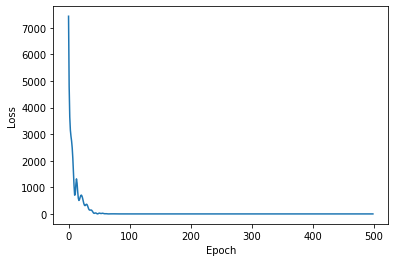

In [12]:
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(history.history['loss'])

In [13]:
print("Закончили обучение модели")
print(model.predict([100.0]))
print("Модель предсказала, что 100 градусов Цельсия соответствуют {} градусам Фаренгейта".format(model.predict([100.0]))) 
print("Значения внутренних переменных слоя l0: {}".format(l0.get_weights()))
print("Значения внутренних переменных слоя l1: {}".format(l1.get_weights()))
print("Значения внутренних переменных слоя l2: {}".format(l2.get_weights()))

Закончили обучение модели
[[211.74742]]
Модель предсказала, что 100 градусов Цельсия соответствуют [[211.74742]] градусам Фаренгейта
Значения внутренних переменных слоя l0: [array([[ 0.11500116, -0.57780796,  0.14595369,  0.63472956]],
      dtype=float32), array([-1.4538978, -2.9796107, -1.7658737,  4.455222 ], dtype=float32)]
Значения внутренних переменных слоя l1: [array([[-0.26556835,  0.63085055,  0.25907347, -0.34418482],
       [-0.138186  , -0.11037156,  0.69805676,  0.39995247],
       [-0.7182139 ,  0.2589498 ,  0.39604074, -0.41223264],
       [ 0.64191955, -0.591117  , -1.4790844 ,  0.5309515 ]],
      dtype=float32), array([ 3.145305 , -2.9281003, -4.276482 ,  2.6172216], dtype=float32)]
Значения внутренних переменных слоя l2: [array([[ 0.67459524],
       [-0.57915485],
       [-1.1483525 ],
       [ 0.551912  ]], dtype=float32), array([3.8084555], dtype=float32)]
